# Analysis of HackerRank Developer Survey 2018

##### SHUANG HAO

## Import Modoules

In [1]:
# print all the outputs in a cell
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly.graph_objs import *
import squarify
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS

# 1. Context

HackerRank (https://www.hackerrank.com), building a platform to create the best experience for both individuals and companies, conducted a survey of their developers late in 2016 in order to provide more transparency for themselves and the world on the state of developers. The survey asked developers many questions around their skills, educational background, current role, and more. The data set they released is the full dataset of 25K responses from our developer survey, which includes both students and professionals. 

# 2. Table of Contents

1. [Context](#1.-Context)<br>
2. [Table of Contents](#2.-Table-of-Contents)<br>
3. [Dataset Discription](#3.-Dataset-Discription)<br>
4. [Analysis](#4.-Analysis)<br>
    4.1 [How Many Male and Female Respondents?](#4.1-How-Many-Male-and-Female-Respondents?)<br>
    4.2 [When Respondents Started Coding？](#4.22-When-Respondents-Started-Coding？)<br>
    4.3 [How Old Are Respondents Now?](#4.3-How-Old-Are-Respondents-Now?)<br>
    4.4 [What is the Highest Level of Education Responts Have?](#4.4-What-is-the-Highest-Level-of-Education-Responts-Have?)<br>
    4.5 [What is the Degree Focus of Respondents?](#4.5-What-is-the-Degree-Focus-of-Respondents?)<br>
    4.6 [What is the Current Role of Respondents in Reality?](#4.6-What-is-the-Current-Role-of-Respondents-in-Reality?)<br>
    4.7 [Are You a Manager?](#4.7-Are-You-a-Manager?)<br>
    4.8 [What are the Most Important Qualifications Hiring Managers are Looking for?](#4.8-What-are-the-Most-Important-Qualifications-Hiring-Managers-are-Looking-for?)<br>
    4.9 [How Well Respondents Like Programming Languages When People Know or Will Learn and When People Already Know?](#4.9-How-Well-Respondents-Like-Programming-Languages-When-People-Know-or-Will-Learn-and-When-People-Already-Know?)<br>

# 3. Dataset Discription

The data consists of five files:

<b>HackerRank-Developer-Survey-2018-Codebook.csv</b>: 
a CSV file with survey schema. This schema includes the questions that correspond to each column name in HackerRank-Developer-Survey-2018-Numeric.csv and HackerRank-Developer-Survey-2018-Values.csv. It also provides extra notes on questions if they were conditionally shown, or what the correct answer was to a coding question.


<b>HackerRank-Developer-Survey-2018-Numeric-Mapping.csv</b>: This file provides the mapping from the numeric values in HackerRank-Developer-Survey-2018-Numeric.csv and what their textual representation in the survey was. Each row represents one of the possible answers to a specific question, with a mapping of the numeric answer in the data file to the textual label in the survey.


<b>Country-Code-Mapping.csv</b>: 
a CSV file that provides the mapping of the numeric country code in our raw data in HackerRank-Developer-Survey-2018-Numeric.csv to the associated country.


<b>HackerRank-Developer-Survey-2018-Numeric.csv</b>: 
a CSV file with the raw survey responses. Each row is one respondent, including an anonymous respondent id, the timestamp of when the survey was started and ended, and the numeric responses to each question. This is the data file that we used for our analysis.


<b>HackerRank-Developer-Survey-2018-Values.csv</b>: 
a CSV file with the text version of the survey responses. Each row is one respondent, including an anonymous respondent id, the timestamp of when the survey was started and ended, and the textual response to each question. This file was derived from HackerRank-Developer-Survey-2018-Numeric.csv using the mapping files that are included in this data set. We provide it for ease of use for those who prefer to work directly with the text values.

In [2]:
df = pd.read_csv("HackerRank-Developer-Survey-2018-Values.csv", delimiter=',')
numeric = pd.read_csv("HackerRank-Developer-Survey-2018-Numeric.csv", delimiter=',')

# 4. Analysis

### 4.1 How Many Male and Female Respondents?

In [29]:
trace0 = go.Bar(
    x=['Male', 'Female', 'Non-Binary'],
    y=df.groupby(df['q3Gender']).size().sort_values(ascending=False)[0:3],
    marker=dict(
        color=['#ac6c5c', '#d48c84', '#915164'],
        line=dict(
            color=['#915164', '#ac6c5c', '#653b56'],
            width=2)
    )
)

data = [trace0]

layout = go.Layout(
    xaxis=dict(
        title='Gender',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Count of Respondents',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        showexponent='all'
    ),
    title='Count of Respondents by Gender',
    width=800,
    height=500,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Count of Respondents by Gender');

#### Insights:
Obviously, coding is men's word. Male developers are almost 5 times of female developers. But there are still 4122 female respondents overcome the sexism in an almost all-male coding culture.

### 4.2 When Respondents Started Coding？

In [30]:
df['q1agebegincoding'] = df['q1AgeBeginCoding'].replace({'16 - 20 years old': '16 - 20',
                                              '11 - 15 years old': '11 - 15',
                                              '21 - 25 years old': '21 - 25',
                                              '5 - 10 years old': '5 - 10',
                                              '26 - 30 years old': '26 - 30',
                                              '31 - 35 years old': '31 - 35',
                                              '36 - 40 years old': '36 - 40',
                                              '41 - 50 years old': '41 - 50',
                                              '50+ years or older': '50+'})

In [31]:
# Overall
df.groupby(df['q1AgeBeginCoding']).size().sort_values(ascending=False)

q1AgeBeginCoding
16 - 20 years old     14293
11 - 15 years old      5264
21 - 25 years old      3626
5 - 10 years old        933
26 - 30 years old       642
31 - 35 years old       193
36 - 40 years old        67
41 - 50 years old        34
#NULL!                   30
50+ years or older        8
dtype: int64

In [32]:
# Female
df[(df['q3Gender']=='Female')&(df['q1AgeBeginCoding']!='#NULL!')].q1AgeBeginCoding.value_counts()

16 - 20 years old     2657
21 - 25 years old      609
11 - 15 years old      569
26 - 30 years old      130
5 - 10 years old        71
31 - 35 years old       48
36 - 40 years old       19
41 - 50 years old       12
50+ years or older       3
Name: q1AgeBeginCoding, dtype: int64

In [33]:
# Male
df[(df['q3Gender']=='Male')&(df['q1AgeBeginCoding']!='#NULL!')].q1AgeBeginCoding.value_counts()

16 - 20 years old     11543
11 - 15 years old      4651
21 - 25 years old      2998
5 - 10 years old        848
26 - 30 years old       506
31 - 35 years old       144
36 - 40 years old        47
41 - 50 years old        22
50+ years or older        3
Name: q1AgeBeginCoding, dtype: int64

In [34]:
order = ['5 - 10', '11 - 15', '16 - 20', '21 - 25',
         '26 - 30', '31 - 35', '36 - 40', '41 - 50', '50+']

trace0 = go.Bar(
    x=order,
    y=df.groupby(df['q1agebegincoding']).size().reindex(order),
    marker=dict(
        color='#ac6c5c',
        line=dict(
            color='#ac6c5c',
            width=2)
    )
)

data = [trace0]

layout = go.Layout(
    xaxis=dict(
        title='Age',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Count of Respondents',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        showexponent='all'
    ),
    title='Count of Respondents by Age Begin Coding'
)

fig0 = go.Figure(data=data,layout=layout)
py.iplot(fig0, filename='Count of Respondents by Age Begin Coding');

In [35]:
sizes_female=df[(df['q3Gender']=='Female')&(df['q1agebegincoding']!='#NULL!')].q1agebegincoding.value_counts().reindex(order)/len(df[(df['q3Gender']=='Female')])
labels_female=order

sizes_male=df[(df['q3Gender']=='Male')&(df['q1agebegincoding']!='#NULL!')].q1agebegincoding.value_counts().reindex(order)/len(df[(df['q3Gender']=='Male')])
labels_male=order

trace1 = go.Bar(
    x=sizes_female,
    y=labels_female,
    name='Female',
    orientation = 'h',
        marker=dict(
        color='#FEBFB3',
        line=dict(
            color='#f88379',
            width=1
        )
     )
)

trace2 = go.Bar(
    x=sizes_male,
    y=labels_male,
    name='Male',
    orientation = 'h',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=1,
        )
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='Distribution of Age Begin Coding by Gender',
    width=800,
    height=700,
    margin=go.Margin(l=100),
    xaxis=dict(
        title='Percentage',
        titlefont=dict(
            size=16,
            color='darkgrey'
        ),
        tickfont=dict(
            size=14
        )
    ),
    yaxis=dict(
        title='Age',
        titlefont=dict(
            size=16,
            color='darkgrey'
        ),
        tickfont=dict(
            size=14
        )
    ),
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Distribution of Age Begin Coding by Gender')

#### Insight:

Most of developers started coding from 16 to 20 years old, which shows that younger generation is more interested in programming in comparison to people of age greater than 35 years old. The higher proportion of women(64.5%) than men(55.6%) got into programming between age group 16 to 20 years. However, more male developers became into computer fan between 11-15 than female.

### 4.3 How Old Are Respondents Now?

In [36]:
df['q2age'] = df['q2Age'].replace({'18 - 24 years old': '18 - 24',
                                   '25 - 34 years old': '25 - 34',
                                   '35 - 44 years old': '35 - 44',
                                   '12 - 18 years old': '12 - 18',
                                   '45 - 54 years old': '45 - 54',
                                   '55 - 64 years old': '55 - 64',
                                   'Under 12 years old': '12-',
                                   '65 - 74 years old': '65 - 74',
                                   '75 years or older': '75+'})

In [37]:
order = ['12-', '12 - 18', '18 - 24', 
         '25 - 34', '35 - 44', '45 - 54', 
         '55 - 64', '65 - 74', '75+']

trace = go.Bar(
    x=order,
    y=df.groupby(df['q2age']).size().reindex(order),
    marker=dict(
        color='#ac6c5c',
        line=dict(
            color='#915164',
            width=2)
    )
)

data = [trace]

layout = go.Layout(
    xaxis=dict(
        title='Age',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Count of Respondents',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        showexponent='all'
    ),
    title='Count of Respondents by Age'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Count of Respondents by Age')

### Insights:
Overall, developer/coder is a younger group and most of them are aged between 18 and 34.

### 4.4 What is the Highest Level of Education Responts Have?

In [38]:
df['q4education'] = df['q4Education'].replace({'College graduate':'College',
                                               'Some college':'College',
                                               'Post graduate degree (Masters, PhD)':'Master/PHD',
                                               'Some post graduate work (Masters, PhD)':'Master/PHD',
                                               'High school graduate':'High school',
                                               'Some high school':'High school',
                                               'Vocational training (like bootcamp)':'Vocational training'})

In [39]:
# Overall
df[df['q4Education']!='#NULL!'].groupby(df['q4Education']).size().sort_values(ascending=False)

q4Education
College graduate                          12010
Post graduate degree (Masters, PhD)        6030
Some college                               2499
Some post graduate work (Masters, PhD)     2493
High school graduate                       1289
Some high school                            316
Vocational training (like bootcamp)         148
dtype: int64

In [40]:
# Female
df[(df['q3Gender']=='Female') & (df['q4Education']!='#NULL!')].groupby(df['q4Education']).size().sort_values(ascending=False)

q4Education
College graduate                          1978
Post graduate degree (Masters, PhD)       1061
Some college                               446
Some post graduate work (Masters, PhD)     386
High school graduate                       139
Some high school                            39
Vocational training (like bootcamp)         11
dtype: int64

In [41]:
# Male
df[(df['q3Gender']=='Male') & (df['q4Education']!='#NULL!')].groupby(df['q4Education']).size().sort_values(ascending=False)

q4Education
College graduate                          9966
Post graduate degree (Masters, PhD)       4918
Some post graduate work (Masters, PhD)    2083
Some college                              2035
High school graduate                      1142
Some high school                           274
Vocational training (like bootcamp)        131
dtype: int64

In [42]:
trace0 = go.Bar(
    x=df[df['q4education']!='#NULL!'].groupby(df['q4education']).size().sort_values(ascending=False).index,
    y=df[df['q4education']!='#NULL!'].groupby(df['q4education']).size().sort_values(ascending=False),
    marker=dict(
        color='#ac6c5c',
        line=dict(
            color='#915164',
            width=2)
    )
)


data = [trace0]

layout = go.Layout(
    xaxis=dict(
        title='Level of Education',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Count of Respondents',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        showexponent='all'
    ),
    title='Count of Respondents by Highest Level of Education',
    margin=go.Margin(b=200, r=200)
)

fig0 = go.Figure(data=data, layout=layout)
py.iplot(fig0, filename='Count of Respondents by Highest Level of Education')

In [43]:
sizes_female=df[(df['q3Gender']=='Female')&(df['q4education']!='#NULL!')].q4education.value_counts().sort_values()/len(df[(df['q3Gender']=='Female')])
labels_female=df[(df['q3Gender']=='Female')&(df['q4education']!='#NULL!')].q4education.value_counts().sort_values().index

sizes_male=df[(df['q3Gender']=='Male')&(df['q4education']!='#NULL!')].q4education.value_counts().sort_values()/len(df[(df['q3Gender']=='Male')])
labels_male=df[(df['q3Gender']=='Male')&(df['q4education']!='#NULL!')].q4education.value_counts().sort_values().index


trace1 = go.Bar(
    x=sizes_female,
    y=labels_female,
    name='Female',
    orientation = 'h',
    marker=dict(
        color='#FEBFB3',
        line=dict(
            color='#f88379',
            width=1
        )
     )
)

trace2 = go.Bar(
    x=sizes_male,
    y=labels_male,
    name='Male',
    orientation = 'h',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=1,
        )
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='Distribution of Educational Level by Gender',
    width=900,
    height=600,
    margin=go.Margin(l=200),
    xaxis=dict(
        title='Percentage',
        titlefont=dict(
            size=16,
            color='darkgrey'
        ),
        tickfont=dict(
            size=14
        )
    ),
    yaxis=dict(
        title='Level of Education',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        tickfont=dict(
            size=14
        )
    ),
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Distribution of Educational Level by Gender')

### Insights:
This is showing programming/coding has relatively high demands on educational background. There are still 1605 respondents with highest qualification of high school, but don't forget we have 1024 respondents younger than 18 years old, which are too young to go to college. So to speak, the threshold of becoming a developer/coder is higher. It is not necessary to get a master or PHD degree, however, very rarely can be a developer/coder without spending several years on higher education.

### 4.5 What is the Degree Focus of Respondents?

In [44]:
a=len(df[df['q5DegreeFocus']=='Computer Science'])
b=len(df[df['q5DegreeFocus']=='Other STEM (science, technology, engineering, math)'])
c=len(df[df['q0005_other'].notnull()])
labels=['Computer Science', 'Other STEM', 'Non STEM']
values=[a, b, c]

fig1 = {
  "data": [
    {
      "values": values,
      "labels": labels,
      "textposition":"inside",
      "hoverinfo":"label+percent",
      "textfont": {"size": 16},
      "type": "pie",
      "marker": {'colors': ['FCD6CA', '#d48c84', '#ac6c5c']},
    }],
  "layout": {
        "title":"Proportion of Respondents by Degree Focus",
        "titlefont": {"size": 20},
            }
}

py.iplot(fig1, filename='Proportion of Respondents by Degree Focus')

In [45]:
a=len(df[df['q6LearnCodeUni']=="School or university"])/1000
b=len(df[df['q6LearnCodeSelfTaught']=="Self-taught (i.e. books, online)"])/1000
c=len(df[df['q6LearnCodeAccelTrain']=="Accelerated training (i.e. bootcamp)"])/1000
d=len(df[df['q6LearnCodeDontKnowHowToYet']=="I don't know how to code yet"])/1000
e=len(df[df['q6LearnCodeOther']=="Other (please specify)"])/1000
        
trace = go.Bar(
    x=[e, d, c, b, a],
    y=['Other', 'dont know how to code yet', 'Accelerated training', 'Self-taught', 'School or university'],
    orientation = 'h',
    marker=dict(
        color='#ac6c5c',
        line=dict(
            color='#915164',
            width=2),
    )
)

data=[trace]

layout = go.Layout(
    xaxis=dict(
        title='Count of Respondents [in k]',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        showexponent='all'
    ),
    title='How Respondents Learn Coding',
    width=1000,
    height=600,
    margin=go.Margin(l=250)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='How Respondents Learn Coding')

### Insights:
1. Developers/coders come from a variety of different educational backgrounds. 70.5% of them have computer science degrees, 22.8% of them are major in other STEM that propably provides some coding courses, while others are self-taught. 
2. If put the first chart and the second one side by side for comparison, you will notice that even though almost three quarters of the respondents have CS degrees, the population of self-taught developers/coders are more than people who study from school. It's possible that developers/coders work at the same time also have to continue to learn new programming languages. The languages they studied from school probably has been out of date.
3. In the past few years, developers/coders training programs have become another viable option for those interested in entering the field. Some Ivy League schools like Georgia Tech and UPenn established one-line CS programs. These flexible online degrees can help make dreams of those people who are interested in coding a reality.

### 4.6 What is the Current Role of Respondents in Reality?

In [46]:
df[df['q9CurrentRole']!='#NULL!'].q9CurrentRole.value_counts()

Student                            8005
Software Engineer                  4482
Full-stack Developer               3498
Back-end Developer                 1922
Web Developer                      1032
Front-end Developer                1006
Mobile Developer                    812
Software Architect                  643
Data Scientist                      485
Software Test Engineer              454
Unemployed                          382
Data Analyst                        349
Development Operations Engineer     251
Data Engineer                       216
Software Specialist                 148
Platform Engineer                   129
Network Administrator                98
Reliability Engineer                 76
Database Administrator               67
Name: q9CurrentRole, dtype: int64

In [47]:
df[(df['q3Gender']=='Female')&(df['q9CurrentRole']!='#NULL!')].q9CurrentRole.value_counts().head(10)

Student                   1770
Software Engineer          622
Full-stack Developer       372
Back-end Developer         234
Web Developer              204
Front-end Developer        189
Software Test Engineer     108
Mobile Developer            88
Unemployed                  82
Data Analyst                72
Name: q9CurrentRole, dtype: int64

In [48]:
df[(df['q3Gender']=='Male')&(df['q9CurrentRole']!='#NULL!')].q9CurrentRole.value_counts().head(10)

Student                   6183
Software Engineer         3824
Full-stack Developer      3102
Back-end Developer        1676
Web Developer              821
Front-end Developer        811
Mobile Developer           720
Software Architect         611
Data Scientist             408
Software Test Engineer     341
Name: q9CurrentRole, dtype: int64

In [49]:
trace0 = go.Bar(
    x=df[df['q9CurrentRole']!='#NULL!'].groupby(df['q9CurrentRole']).size().sort_values(ascending=True).tail(10),
    y=df[df['q9CurrentRole']!='#NULL!'].groupby(df['q9CurrentRole']).size().sort_values(ascending=True).tail(10).index,
    orientation = 'h',
    marker=dict(
        color='#ac6c5c',
        line=dict(
            color='#915164',
            width=2)
    )
)


data = [trace0]

layout = go.Layout(
    xaxis=dict(
        title='Count of Respondents',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Current Role',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        showexponent='all'
    ),
    title='How Many Respondents in Top 10 Roles',
    width=1000,
    height=600,
    margin=go.Margin(l=200)
)



fig0 = go.Figure(data=data, layout=layout)
py.iplot(fig0, filename='How Many Respondents in Top 10 Roles')

In [50]:
sizes_female=df[(df['q3Gender']=='Female')&(df['q9CurrentRole']!='#NULL!')].q9CurrentRole.value_counts().sort_values().tail(10)/len(df[(df['q3Gender']=='Female')])
labels_female=df[(df['q3Gender']=='Male')&(df['q9CurrentRole']!='#NULL!')].q9CurrentRole.value_counts().sort_values().tail(10).index

sizes_male=df[(df['q3Gender']=='Male')&(df['q9CurrentRole']!='#NULL!')].q9CurrentRole.value_counts().sort_values().tail(10)/len(df[(df['q3Gender']=='Male')])
labels_male=df[(df['q3Gender']=='Male')&(df['q9CurrentRole']!='#NULL!')].q9CurrentRole.value_counts().sort_values().tail(10).index

trace1 = go.Bar(
    x=sizes_female,
    y=labels_female,
    name='Female',
    orientation = 'h',
        marker=dict(
        color='#FEBFB3',
        line=dict(
            color='#f88379',
            width=1
        )
     )
)

trace2 = go.Bar(
    x=sizes_male,
    y=labels_male,
    name='Male',
    orientation = 'h',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=1,
        )
    )
)

data = [trace1, trace2]
layout = go.Layout(
    title='Distribution by Gender in Top 10 Role',
    width=900,
    height=700,
    margin=go.Margin(l=200),
    xaxis=dict(
        title='Percentage',
        titlefont=dict(
            size=20,
            color='darkgrey'
        ),
        tickfont=dict(
            size=14
        )
    ),
    yaxis=dict(
        title='Current Role',
        titlefont=dict(
            size=20,
            color='darkgrey'
        ),
        tickfont=dict(
            size=14
        )
    ),
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Distribution by Gender in Top 10 Roles')

### Insights:
1. Only one role related to data made the top 10: Data scientist.
2. The positions of female respondents and male respondents are quite similar. Look student, though, female students has higher proportion than male. I think this is a rosy future，which means more yound wemon are beginning to join in this filed.

### 4.7 Are You a Manager?

In [51]:
trace1 = go.Bar(
    x=['Male', 'Female', 'Non-Binary' ],
    y=df[(df['q16HiringManager']=='Yes')].groupby(df['q3Gender']).size().sort_values(ascending=False)[0:3],
    name='Managers',
    marker=dict(
        color=['#d48c84', '#d48c84', '#d48c84'],
        line=dict(
            color=['#ac6c5c', '#ac6c5c', '#ac6c5c'],
            width=2)
    )
)
    
trace2 = go.Bar(
    x=['Male', 'Female', 'Non-Binary' ],
    y=df[(df['q16HiringManager']=='No')].groupby(df['q3Gender']).size().sort_values(ascending=False)[0:3],
    name='Non-Managers',
    marker=dict(
        color=['#ac6c5c', '#ac6c5c', '#ac6c5c'],
        line=dict(
            color=['#915164', '#915164', '#915164'],
            width=2)
    )
)

data = [trace2, trace1]

layout = go.Layout(
    xaxis=dict(
        title='Gender',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Count of Respondents',
        titlefont=dict(
            size=18,
            color='darkgrey'
        ),
        showticklabels=True,
        tickfont=dict(
            size=16,
            color='black'
        ),
        showexponent='all'
    ),
    title='If Respondent is Manager by Gender',
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')
plt.savefig('If Respondent is Manager by Gender');

<Figure size 432x288 with 0 Axes>

### Insights:
If you look back to see those pink and blue bar charts (breakdown by gender), you might get the idea that there is no big difference between male respondents and female respondents, however, only 19% females became to be managers. By contrast, the proportion of managers for male is more than 33%. It is still very hard to be successful while these female have the same educational background, took to coding when they were young, being at the similar age and doing the same jobs just like guys. Nowadays, all over the world to advocate equality between men and women, and in fact the situation is become better and better, but many people still hold on biased concept in the subconscious.

### 4.8 What are the Most Important Qualifications Hiring Managers are Looking for?

If the respondents choosed "Yes" in Q16 (Do you interview people as part of your company's hiring process),   they picked three of the most important qualifications they look for in an engineering candidate before the onsite.

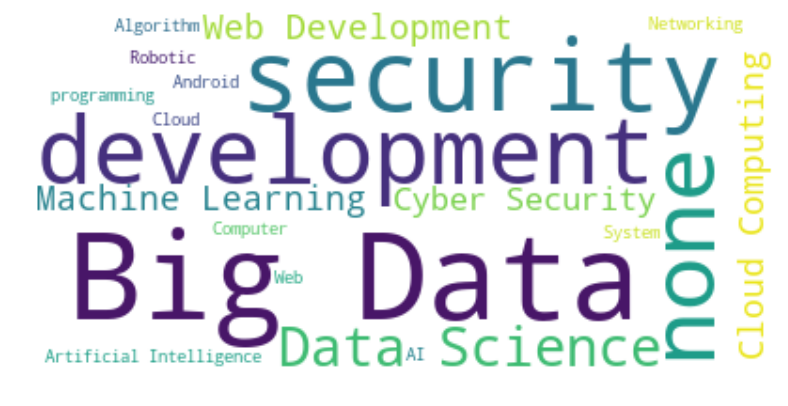

In [52]:
plt.figure(figsize=(12, 8))
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = (" ".join(df['q0027_other'].dropna()))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=20, stopwords=stopwords)
#minimun fontsize

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "WordCloud.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.show();

#### Insights:
1. Big Data, Security, Development, Data Science, Cloud and Machine Learning have a huge scope in the future. It is evident that with the increasiing data, we need to save the data, thus we need Cloud, then we need to analyze and build automative systems, for this we need Data Science and Machine Learning and Security for storing the data. Thus candidates developing skills in these domains have a bright future ahead.
2. The picture of Big Data looks good, however, in the question of current roles, the ranking of Data Scientist is 9 and it is the only one made top 10. Why this domain is in high demand but the group of people work on data is not as big as we thought? It is impossible that data positions demand very comprehensive capability for candidates, such as programming languages, statistics, modeling, analytical mind.. Employers are willing to pay them a lot, while not many can be good at all those skills.

### 4.9 How Well Respondents Like Programming Languages When People Know or Will Learn and When People Already Know?

Programming plays an important role in programming, and people should know how to read and write code written in different programming languages.

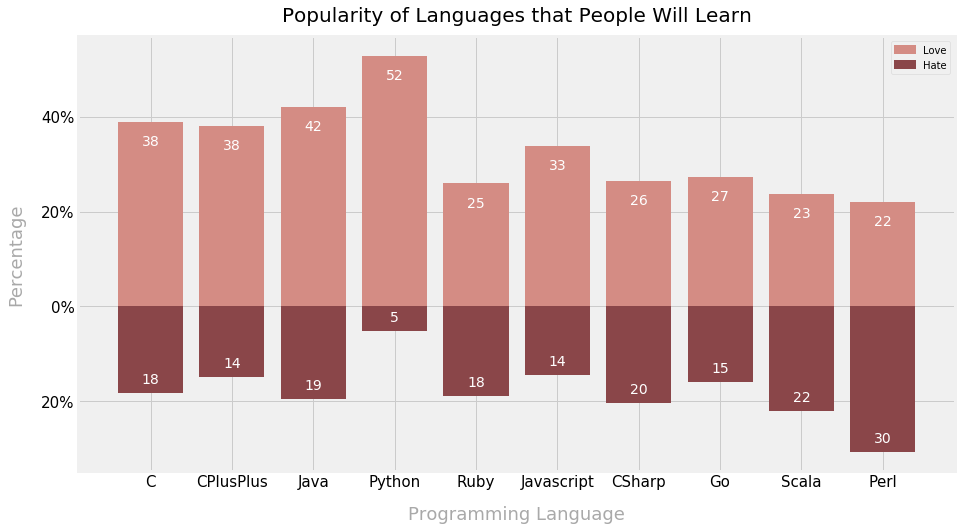

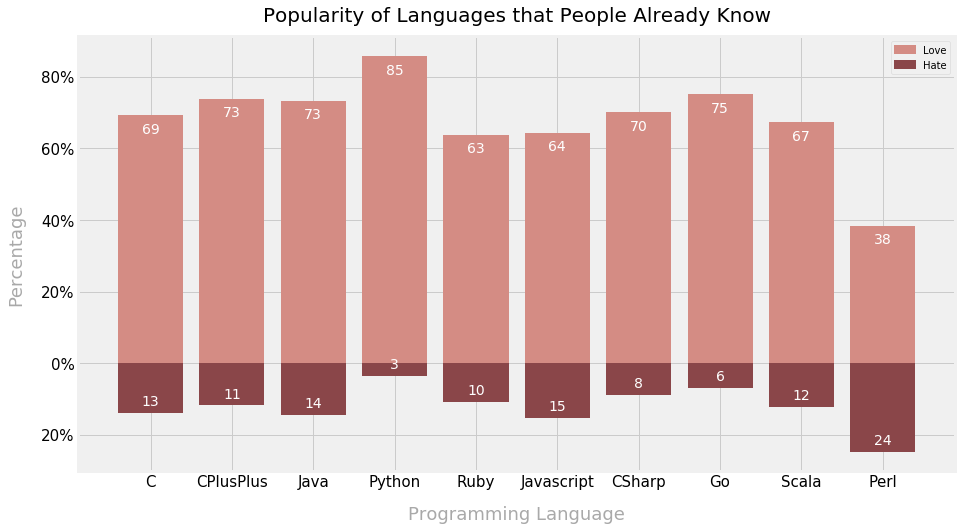

In [53]:
# Know or will learn
columns = [i for i in df.columns.ravel() if 'q28' in i]
langs_known = [i for i in df.columns.ravel() if 'q25' in i]
columns = columns[-24:-14]
langs_known = langs_known[-24:-14]

plt.figure(figsize=(14, 8))


love_height = []
hate_height = []

for i, j in enumerate(zip(columns, langs_known)):
    love = len(numeric[(numeric[j[1]]==2) & (df[j[0]]=='Love')])/(len(numeric[numeric[j[1]]==2]))
    plt.bar(i, love, color='#d48c84')
    plt.text(i, love-0.05, '%i' % int(love*100), horizontalalignment='center', size=14, color='white')
    
    hate = len(numeric[(numeric[j[1]]==2) & (df[j[0]]=='Hate')])/(len(numeric[numeric[j[1]]==2]))
    plt.bar(i, -hate, color='#8a4649')
    plt.text(i, -hate+0.02, '%i' % int(hate*100), horizontalalignment='center', size=14, color='white')
    
    love_height.append(love)
    hate_height.append(hate)

    
custom_lines = [matplotlib.patches.Patch(color='#d48c84', lw=2),
                matplotlib.patches.Patch(color='#8a4649', lw=2)]
    
plt.legend(custom_lines, ['Love', 'Hate'])

plt.gca().set_xticks(range(len(columns)))
plt.gca().set_xticklabels([j.split('Love')[-1] for j in columns], fontsize=15)
plt.gca().set_title('Popularity of Languages that People Will Learn', fontsize=20, y=1.02)
plt.gca().set_yticklabels(['%i%%' % abs(i*100) for i in plt.yticks()[0]], fontsize=15)
plt.xlabel('Programming Language', fontsize=18, color='darkgrey', labelpad=16)
plt.ylabel('Percentage', fontsize=18, color='darkgrey', labelpad=16);


# Already know
plt.figure(figsize=(14, 8))

love_height = []
hate_height = []

for i, j in enumerate(zip(columns, langs_known)):
    love = len(numeric[(df[j[1]]=='Know') & (df[j[0]]=='Love')])/(len(numeric[df[j[1]]=='Know']))
    plt.bar(i, love, color='#d48c84')
    plt.text(i, love-0.05, '%i' % int(love*100), horizontalalignment='center', size=14, color='white')
    
    hate = len(numeric[(df[j[1]]=='Know') & (df[j[0]]=='Hate')])/(len(numeric[df[j[1]]=='Know']))
    plt.bar(i, -hate, color='#8a4649')
    plt.text(i, -hate+0.02, '%i' % int(hate*100), horizontalalignment='center', size=14, color='white')
    
    love_height.append(love)
    hate_height.append(hate)
    
custom_lines = [matplotlib.patches.Patch(color='#d48c84', lw=2),
                matplotlib.patches.Patch(color='#8a4649', lw=2)]
    
plt.legend(custom_lines, ['Love', 'Hate'])

plt.gca().set_xticks(range(len(columns)))
plt.gca().set_xticklabels([j.split('Love')[-1] for j in columns], fontsize=15)
plt.gca().set_title('Popularity of Languages that People Already Know', fontsize=20, y=1.02)
plt.gca().set_yticklabels(['%i%%' % abs(i*100) for i in plt.yticks()[0]], fontsize=15)
plt.xlabel('Programming Language', fontsize=18, color='darkgrey', labelpad=16)
plt.ylabel('Percentage', fontsize=18, color='darkgrey', labelpad=16);

### Insights:
1. Users of HackerRank like Python best! Is doesn't mean Python has the largest user population, but it is apparently that Python performs better than all the other languages, maximizing coder satisfaction.
2. Put both of above two plots together, I found that the heights of hate bars in the first chart are shorter than those in the second chart. This indicates that people usually feel bad at the very beginning of their coding study or they worry about if they can handle the language, but they feel a lot better when they really master it. 